<a href="https://colab.research.google.com/github/Janeth172/EDP1/blob/main/Camacho%20Salvador%20Janeth_CodigoRichardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Método implícito de Richardson

**EJERCICIO**

*MALLA*:
$$h=0.1 ,\hspace{0.3cm} k=0.01$$

Puntos espaciales:
$$ x_i = ih, \hspace{2.0cm} i = 0,1,...,10$$

Puntos en el tiempo
$$ t_j = jk, \hspace{2.0cm} j = 0,1,2,...$$


*CONDICIONES DE FRONTERA:*
$$u(0,t) = 0 \Rightarrow u_{0j}=0$$
$$u(1,t) = 0 \Rightarrow u_{1j}=0$$

*CONDICIÓN INICIAL*

$$u(x,0) = sin( \pi x) \Rightarrow u_{i,0} = sin(\pi x_i)$$

La ecuación diferencial a resolver es
$$
\frac{\partial u}{\partial t} - \alpha^2 \frac{\partial^2 u}{\partial x^2} = 0 $$

Usando diferencias regresivas en el tiempo
$$
\frac{\partial u}{\partial t}(x_i,t_j)
\approx
\frac{u_{i,j} - u_{i,j-1}}{k}
$$

y diferencias centradas en el espacio
$$
\frac{\partial^2 u}{\partial x^2}(x_i,t_j)
\approx
\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2}
$$

sustituyendo en la ecuación
$$
\frac{u_{i,j} - u_{i,j-1}}{k}
-
\alpha^2
\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2}
= 0
$$

Multiplicando por $k$
$$
u_{i,j} - u_{i,j-1}
-
\lambda \left( u_{i+1,j} - 2u_{i,j} + u_{i-1,j} \right)
= 0,
$$

donde
$$
\lambda = \frac{\alpha^2 k}{h^2}
$$

Finalmente, agrupamos términos en $u_{i,j}$
$$
(1 + 2\lambda)\,u_{i,j}
- \lambda u_{i+1,j}
- \lambda u_{i-1,j}
=
u_{i,j-1}
$$

Como $\lambda = 1$, queda
$$
3u_{i,j} - u_{i+1,j} - u_{i-1,j} = u_{i,j-1}
$$

Las ecuaciones para el primer paso en tiempo $t_1$ son:

$$
3U_{1,1} - U_{2,1} - U_{0,1} = U_{1,0}
$$

$$
3U_{2,1} - U_{3,1} - U_{1,1} = U_{2,0},
$$

$$
3U_{3,1} - U_{4,1} - U_{2,1} = U_{3,0},
$$

$$
3U_{4,1} - U_{5,1} - U_{3,1} = U_{4,0},
$$

$$
3U_{5,1} - U_{6,1} - U_{4,1} = U_{5,0},
$$

$$
3U_{6,1} - U_{7,1} - U_{5,1} = U_{6,0},
$$

$$
3U_{7,1} - U_{8,1} - U_{6,1} = U_{7,0},
$$

$$
3U_{8,1} - U_{9,1} - U_{7,1} = U_{8,0},
$$

$$
3U_{9,1} - U_{10,1} - U_{8,1} = U_{9,0}.
$$

In [255]:
%matplotlib inline

import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap


In [256]:
def f(x):
    return np.sin(np.pi*x)

In [257]:
A = sp.Matrix([[3,-1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 3,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 3,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 3,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 3,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 3,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 3,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 3,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 3,]])

**Ejercicio 1**: Codificar la matriz A de manera más simple.

In [258]:
# /////////////////////////////////////////////////////////////////////////////////////////////////////////
#   MATRIZ TRIDIAGONAL PARA RICHARDSON
# /////////////////////////////////////////////////////////////////////////////////////////////////////////

# Basta indicar el número de puntos interiores n y el parámetro lambda.
# La matriz resultante es tridiagonal, donde:
#   - La diagonal principal vale 1 + 2λ
#   - Las dos diagonales adyacentes valen -λ

def matriz_richardson(n, lam):
    A_nueva = sp.zeros(n, n)
    for i in range(n):
        A_nueva[i, i] = 1 + 2*lam      # DIAGONAL PRINCIPAL
        if i > 0:
            A_nueva[i, i-1] = -lam     # SUBDIAGONAL
        if i < n-1:
            A_nueva[i, i+1] = -lam     # DIAGONAL SUPERIOR
    return A_nueva


In [259]:
# //////////////////////////////////////////////////////////////////////////////////////////////////////////
# PARÁMETROS DEL METODO NUMERICO
# /////////////////////////////////////////////////////////////////////////////////////////////////////////

# n: cantidad de puntos interiores donde la solución es desconocida
#    (estos formarán la dimensión de la matriz A del método)
n = 9

# lam: parámetro que proviene de la relación λ = k/h²
#      y que controla la influencia temporal respecto al espaciamiento
lam = 1

A_nueva = matriz_richardson(n, lam)
A_nueva

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [260]:
# //////////////////////////////////////////////////////////////////////////////////////////////////////////
# VECTOR b
# //////////////////////////////////////////////////////////////////////////////////////////////////////////

# Valores de la función f(x) evaluados en los puntos interiores
# Estos valores forman el lado derecho del sistema A * u = b

b = sp.Matrix([f(0.1), f(0.2), f(0.3), f(0.4), f(0.5), f(0.6), f(0.7), f(0.8), f(0.9)])
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

**Ejercicio 2**: Definir las entradas de b de manera más simple (quizás con un bucle).

Para la construcción del vector $𝑏$ del sistema lineal
$𝐴 u = b$, se recurre a los puntos interiores del dominio, los cuales vienen determinados por el tamaño de paso $h$

Dado que la discretización espacial se define mediante
$$
x_i = i\,h, \qquad i = 1,2,\ldots,n,
$$
evaluamos la función $f(x)$ en cada uno de estos puntos para obtener el vector
$$
\mathbf{b} =
\begin{bmatrix}
f(x_1) \\
f(x_2) \\
\vdots   \\
f(x_n)
\end{bmatrix}
=
\begin{bmatrix}
f(h) \\
f(2h) \\
\vdots \\
f(nh)
\end{bmatrix}
$$

Esta construcción se forma automática, donde cada término $f(i\,h)$ se genera para $i = 1,\ldots,n$. Finalmente, utilizamos $\texttt{sp.Matrix} $ para organizar dichos valores en un vector columna, facilitando así su
manipulación y visualización dentro del marco simbólico de $ \texttt{SymPy}$

In [261]:
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# VECTOR b ASOCIADO AL SISTEMA A·u = b
# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////
# Para ello utilizamos únicamente el tamaño de paso h y el número de
# puntos interiores n, previamente determinado al definir la matriz A

h = 0.1
b_nuevo = sp.Matrix([f(i*h) for i in range(1, n+1)])

b_nuevo

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

Para obtener la solución del sistema lineal $A\,\mathbf{u} = \mathbf{b}$, empleamos el método $\texttt{LUsolve}$ de $\texttt{SymPy}$ el cual realiza de manera automática la factorización LU de la matriz $A$ y posteriormente resuelve el sistema mediante sustitución progresiva y regresiva


In [262]:
# SOLUCION DEL SISTEMA A·u = b mediante factorización LU
A_nueva.LUsolve(b_nuevo)

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

Esta función es solo de prueba. La puede omitir para optimizar la presentación.

In [263]:
def richardson_1(A, b, j):
    b_1 = b
    for i in range(j+1):
        sol = A.LUsolve(b_1)
        b_1 = sol
        _ = None #Para que no imprima resultados parciales
    return b_1

In [264]:
def richardson(A, b, j):
    # Lista donde se guardan las iteraciones
    S = []

    # Copiamos b para usarlo como valor inicial
    b_1 = b.copy()

    for i in range(j+1):
        # Guardamos la aproximación actual (como vector fila)
        S.append(np.array(b_1, dtype=float).reshape(-1))

        # Resolvemos A·x = b_1 mediante LU
        sol = A.LUsolve(b_1)

        # Actualizamos el vector para la siguiente iteración
        b_1 = sol

    # Devolvemos todas las iteraciones en forma de matriz
    return np.array(S)


**Ejercicio 4**: Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta (quizás necesite calcularla).  

La discretización temporal se realiza mediante un tamaño de paso $k>0$ y un tiempo
final $t_f>0$. El número total de iteraciones está dado por
$$
N_t = \frac{t_f}{k}.
$$

Para cada punto interior $x_i$, con $i=1,\dots,n$, se construye el vector inicial
$$
u(x,0) = \bigl(f(x_1),\, f(x_2),\, \dots,\, f(x_n)\bigr)^{\top}
$$

La evolución de la solución se obtiene resolviendo en cada paso de tiempo el
sistema lineal asociado a la matriz $A$
$$
u^{(m+1)} = A^{-1} u^{(m)}, \qquad m=0,1,\dots,N_t.
$$

Finalmente, la función $u(x,t_f)$ se representa gráficamente respecto a la
discretización espacial $\{x_i\}$.


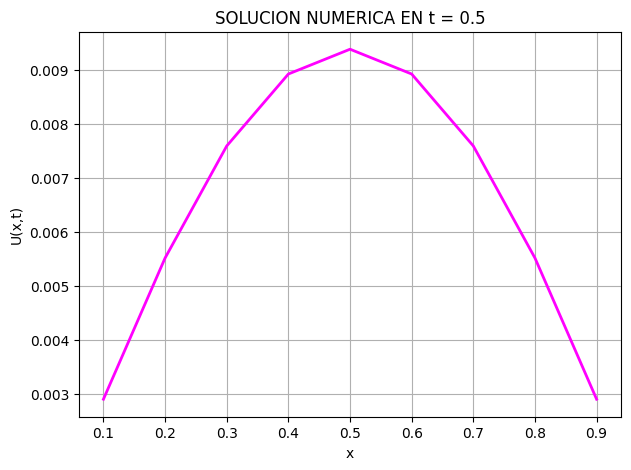

In [265]:
# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# GRAFICA PARA UN VALOR T >0
# //////////////////////////////////////////////////////////////////////////////////////////////////////////////////

t_f = 0.5  # t debe ser > 0
k = 0.01
x_in = np.array([i*h for i in range(1, n+1)], float)
# se define un arreglo similar a b_nuevo, pero ahora sin evaluar en f()
Nt = int(t_f / k)   # definimos el número de iteraciones para un mejor control

# Escribimos la solución
sol_num = sp.Matrix([f(x) for x in x_in])  # esto genera u(x,0)

for _ in range(Nt):
    sol_num = A_nueva.solve(sol_num)   # pasos en el tiempo

sol_num = np.array(sol_num, float).flatten()
# el uso de flatten es para poder graficar como un vector
# soluciona si hay problema en las dimensiones

# grafica de la solución numérica
plt.figure(figsize=(7,5))
plt.plot(x_in, sol_num, color='magenta', linewidth=2)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'SOLUCION NUMERICA EN t = {t_f}')
plt.grid(True)
plt.show()



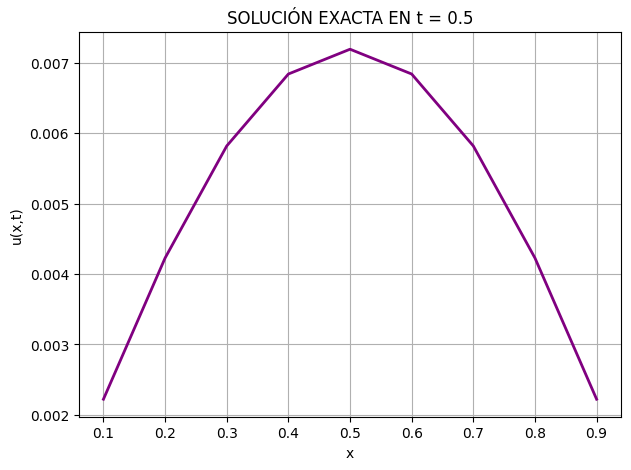

In [266]:
# //////////////////////////////////////////////////////////////////////////////////////////////////////////
# DEFINICIÓN DE LA SOLUCIÓN EXACTA DEL PROBLEMA
#///////////////////////////////////////////////////////////////////////////////////////////////////////////
def u_ex(x, t):
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

# Evaluación de la solución exacta en los puntos interiores
sol_ex = u_ex(x_in, t_f)

# Representación gráfica de la solución exacta
plt.figure(figsize=(7,5))
plt.plot(x_in, sol_ex, color='purple', linewidth=2)
plt.xlabel('x')
plt.ylabel(r'u(x,t)')
plt.title(f'SOLUCIÓN EXACTA EN t = {t_f}')
plt.grid(True)
plt.show()



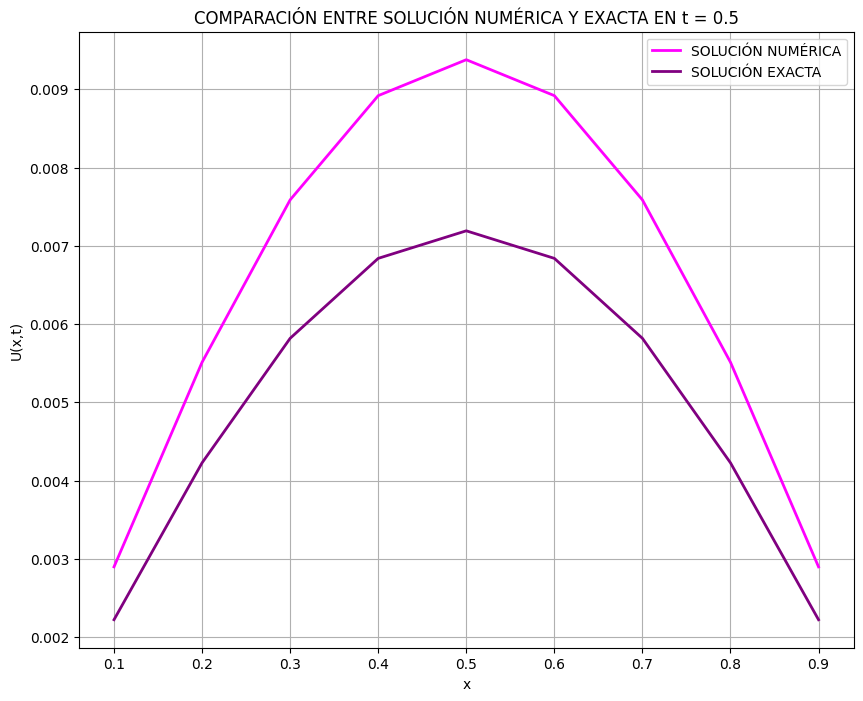

In [267]:
# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# COMPARACIÓN ENTRE SOLUCIÓN NUMÉRICA Y EXACTA
# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

plt.figure(figsize=(10,8))

# solución numérica
plt.plot(x_in, sol_num, color='magenta', linewidth=2, label='SOLUCIÓN NUMÉRICA')

# solución exacta
plt.plot(x_in, sol_ex, color='purple', linewidth=2, label='SOLUCIÓN EXACTA')

plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'COMPARACIÓN ENTRE SOLUCIÓN NUMÉRICA Y EXACTA EN t = {t_f}')
plt.grid(True)
plt.legend()
plt.show()


**Ejercicio 5**:¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?

No, no es necesario resolver un sistema lineal de dimensión $9\times 9$ en cada paso temporal. La matriz de Richardson $A_{\text{nueva}}$ permanece fija durante toda la evolución, por lo que su descomposición $LU$ puede calcularse una sola vez.
A partir de esa factorización, cada avance en el tiempo se obtiene aplicando sucesivamente las matrices triangulares ya determinadas. Así reduciendo de manera notable el costo computacional del método, pues evita resolver el sistema completo en cada iteración.


In [268]:
j = 20 # Número de pasos en el tiempo

In [269]:
U=richardson(A, b, j)

In [270]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.6, j+1) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

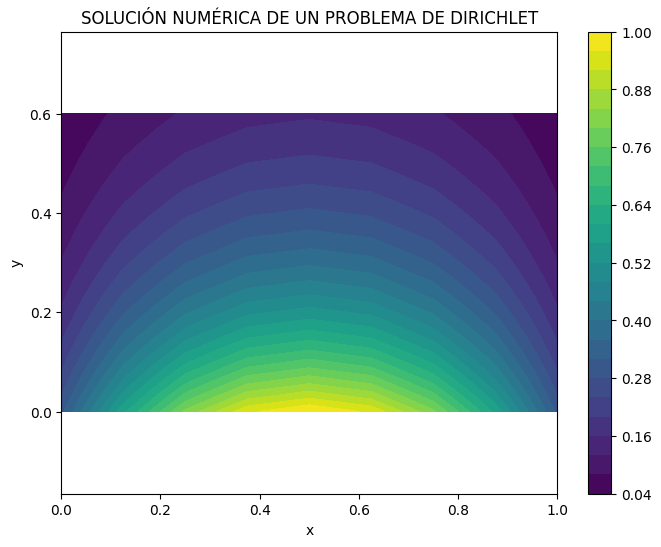

In [271]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('SOLUCIÓN NUMÉRICA DE UN PROBLEMA DE DIRICHLET')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

***GRÁFICA 1***

La gráfica representa la evolución temporal de la solución numérica $u(x,t)$.

En el eje horizontal se muestran los valores de $x$, mientras que en el eje
vertical aparece el tiempo. El mapa de colores indica la magnitud de la solución: los tonos más claros corresponden a valores más altos de $u$, y los tonos oscuros a valores más pequeños.

Dado que se trata de un problema de difusión con condiciones de Dirichlet, la solución tiende a suavizarse conforme avanza el tiempo. Esto puede observarse en cómo la "onda" inicial pierde amplitud y se distribuye de manera más uniforme a
medida que $t$ aumenta.


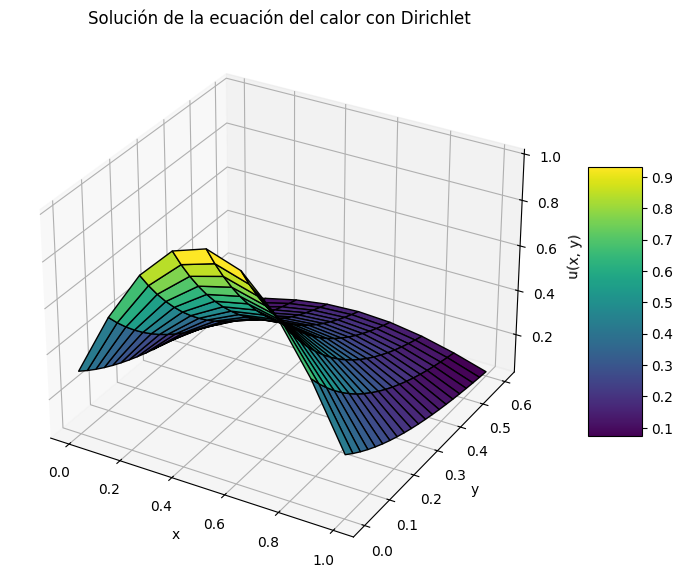

In [272]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

***GRÁFICA 2***

La gráfica tridimensional representa la evolución de la solución numérica
$u(x,t)$ de la ecuación del calor.

El eje $x$ corresponde a la posición espacial, mientras que el eje $y$ indica el tiempo. El valor de la solución se muestra en el eje vertical, formando una superficie donde la altura describe la magnitud de $u(x,t)$.

La superficie inicia con la forma de la condición inicial y, mientras avanza el tiempo, desciende y se suaviza debido al comportamiento difusivo de la ecuación del calor.

Las condiciones de Dirichlet en los extremos mantienen la solución igual a cero en los bordes, lo cual se refleja en que la superficie se apoya siempre en esos valores.


**Ejercicio 6**: Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?


En las gráficas se puede observar que la solución no aparece tan suave como se esperaría. Esto se debe a que únicamente se están utilizando $9$ puntos
interiores, lo cual produce una malla relativamente gruesa.

Con tan pocos
nodos, la aproximación no logra capturar variaciones más finas de la solución, ahí que la curva se vea algo quebrada o poco suave


#### Rúbrica:


|   Criterio | Calificación|
|:----------:|:-----------:|
| Presentación    |  10 puntos   |  
| Comentarios  |  10 puntos   |
| Documentación  |  10 puntos   |
| Funcionamiento  |  10 puntos   |
| Corrección  |  10 puntos   |
| Ejercicios  |  40 puntos   |
| Autonomía  |  10 puntos   |



**Comentarios**: Explicación breve y concisa sobre los bloques de códigos, funciones, etc.<br>
**Documentación**: Anotaciones sobre la sintaxis de Python: verisones, uso de librerías, estructuras, funciones búcles, etc. Solo lo que no sea obvio. <br>
**Presentación**: Uso profesional de texto, imágenes, tablas, ecuaciones para completar la Notebook (Que esta pueda usarse en una presentación).<br>
**Ejercicios**: Presenta la solución completa correcta de los ejercicios propuestos.<br>
**Funcionamiento**: El código se puede ejecutar sin errores.<br>
**Corrección**: El código devuelve las funciones correctas.<br>
**Autónomia**: Uso razonado e inteligente de la IA. Por ética, su uso causará la mínima calificación global.<br>



Material extra. Si lo desea, incorpore el material que pueda aprovechar en el lugar conveniente.

In [273]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot(x, U[0], lw=2)
ax.set_ylim(np.min(U), np.max(U))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)
plt.show()

<IPython.core.display.Javascript object>

In [274]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis)
plt.show()

<IPython.core.display.Javascript object>

In [275]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

def update(k):
    ax.clear()
    ax.plot_surface(X, Y, U, cmap=cm.viridis)   # superficie completa
    ax.plot(x, y[k]*np.ones_like(x), U[k], color='r', lw=3)  # curva que se mueve
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    ax.set_title(f"Iteración / Tiempo: {k}")
    return []

anim = FuncAnimation(fig, update, frames=len(y), interval=200)
plt.show()


<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [276]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np

# U ya viene de:
# U = richardson(A, b, j)
# y y x ya están definidos

fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(x, U[0], lw=2, color='blue')

ax.set_ylim(np.min(U), np.max(U))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U[k])
    ax.set_title(f'Tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)

# Guardar como GIF
writer = PillowWriter(fps=6)
anim.save("animacion.gif", writer=writer)

print("Listo: archivo guardado como animacion.gif")


<IPython.core.display.Javascript object>

Listo: archivo guardado como animacion.gif
